In [1]:
# Import Tensorflow

import tensorflow as tf
import tensorflow_hub as hub

print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)

#Check for GPU availablity
# Do we have access to a GPU?
device_list = tf.config.list_physical_devices()
if "GPU" in [device.device_type for device in device_list]:
  print(f"[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be speed up!")
  print(f"[INFO] Accessible devices:\n{device_list}")
else:
  print(f"[INFO] TensorFlow does not have GPU available to use. Models may take a while to train.")
  print(f"[INFO] Accessible devices:\n{device_list}")

TF Version: 2.10.0
TF Hub Version: 0.8.0
[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be speed up!
[INFO] Accessible devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
#Import Pandas

import pandas as pd
labels_csv = pd.read_csv("labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [3]:
len(labels_csv)

10222

<Axes: xlabel='breed'>

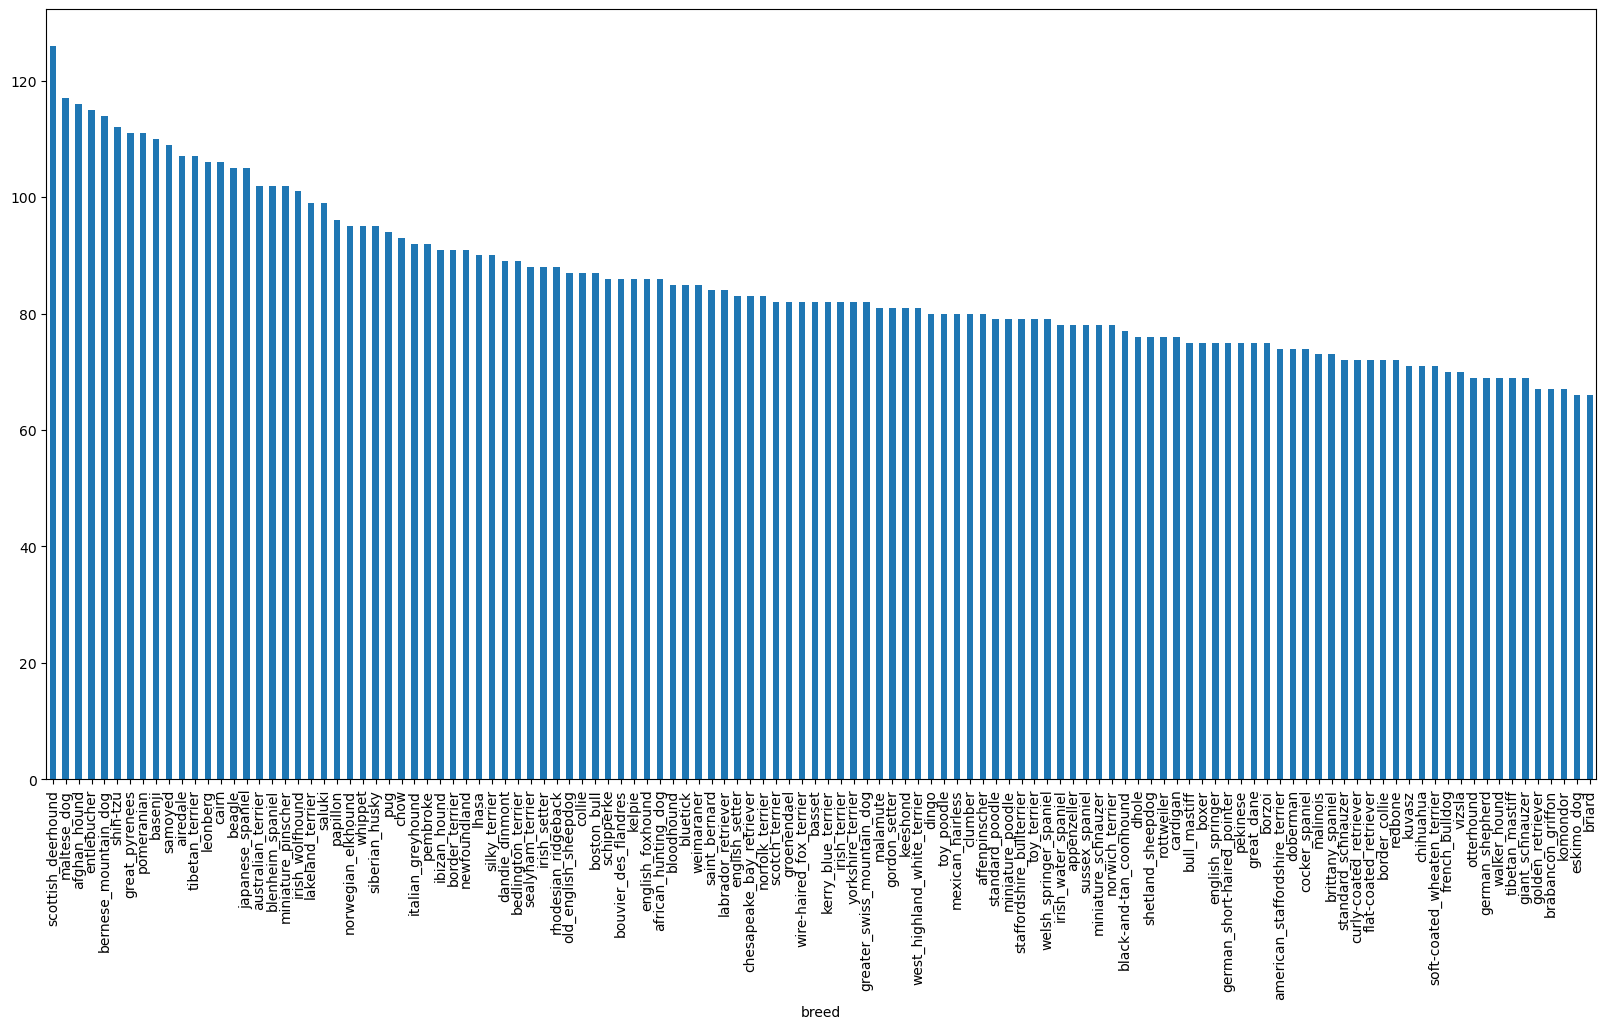

In [4]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [5]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

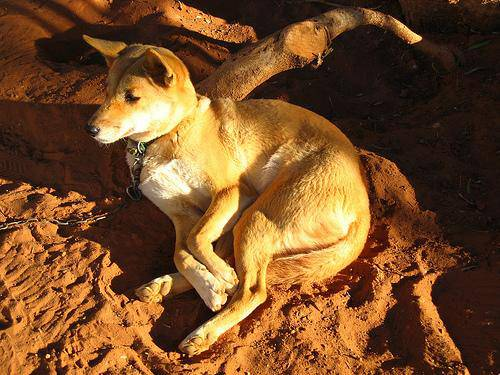

In [6]:
from IPython.display import Image
Image("train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

In [7]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
filenames = ["train/" + fname + ".jpg" for fname in labels_csv["id"]]

#Check the first  10
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
#Check no. of filenaems matches no. of actual image files
import os

if len(os.listdir("train/")) == len(filenames):
    print("File names macth actual Qty of files!!! Proceed")
else:
    print("Filenames Do not Match to Actual Qty of Files")


File names macth actual Qty of files!!! Proceed


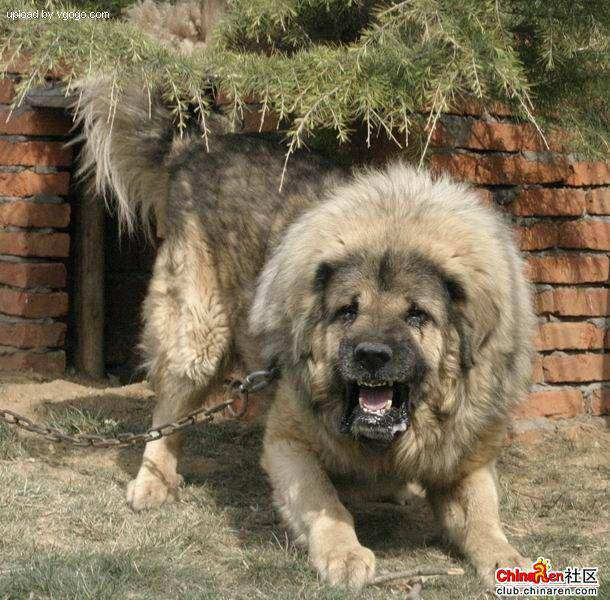

In [10]:
# Check Data format
Image(filenames[9000])

In [11]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [12]:
import numpy as np 

#convert names into np array's
labels = labels_csv["breed"].to_numpy()
labels = np.array(labels) #does the same thing

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
if len(labels) == len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print("No. of Labels does not macth number of filenames")


Number of labels matches number of filenames!


In [15]:
unique_breeds = np.unique(labels)
print("No. of Breeds:",len(unique_breeds))

No. of Breeds: 120


In [16]:
# Turn a single label into an aray of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels = np.array(boolean_labels).astype(int)

In [18]:
len(boolean_labels)

10222

In [19]:
boolean_labels[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Creating our own validation set

In [20]:
# Setup X and y Variables
X = filenames
y = boolean_labels

# Try to minimize time while training a model, so work with less data at first


In [21]:
NUM_IMAGES = 1000

In [22]:
# Split data into two different sets

from sklearn.model_selection import train_test_split

#Split the data

X_Train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

# Check the shape of data
len(X_Train), len(X_val), len(y_train), len(y_val)


(800, 200, 800, 200)

In [23]:
# Lets have a wuick look at data of training

X_Train[:2], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

## PreProcessing Images (truning images into tensors)

steps:

1. Take a image from filepath as input.
2. Use Tensorflow to read and save image to variable.
3. Turn image into tensors.
4. Resize image to be a shape of (224,224).
5. Return the modified image.

In [24]:
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [25]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

### Now we have seen ehat image looks like in a tensor, lets make a function to preprocess them

1. Take an image filepath as input
2. Use tensorflow to read the file and save it to a variable
3. Turn our image into ten set_matplotlib_formats
4. Resize Image to 224,224
5. Return the modified image

In [26]:
# Define image size
IMG_SIZE = 224

# Create a function for pre processing images
def process_image(image_path):
    """
    Takes an image file path and turn the image into a tensor 
    """

    #Read in an image file
    image = tf.io.read_file(image_path)

    #Turn jpeg image into numerical tensor with 3 channels color RGB
    image = tf.image.decode_jpeg(image, channels=3)

    #convert the color channel values from 0 -255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)

    #Resize the image to our desired value (224,224)
    image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

    return image

## Turning our data into batches

Why turn in batches?

All images might not fit into memory so all data cannot go in one go, 
thats why we do about 32 images at a time.

In order to use Tensorflow effectively, we need our data in the from of tensor tuples which look like this : (images, labels)

In [27]:
# create a simple function to retrun a tuple (image, tuple)

def get_image_label(image_path, label):
    """Takes an image file path name and the associated label,
        processes the image and retrun a tuple of (image, label)
    """
    image = process_image(image_path)
    return image,label

#Demo of above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got to turn our data into tuples of tensors in the form :

(image,label), let's make a function to turn all our data (X , Y) intp batches

In [28]:
#Define bacth size = 32
BATCH_SIZE = 32

#Create afunction to turn data into batches
def create_data_batches(X,y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
    """
    Create bacthes of data out of image (X) and label (y) Pairs.
    Shuffles the data if its training data but doesn't shuffle if its validation data
    Also accepts test data as input (ni labels)
    """

    # If the data is a test dataset, we probably dont have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    # If the sata is a valid dataset, we don't need to shuffle it
    elif valid_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print(" Creating training data batches...")
        #Turn file paths and labels into tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))

        #Shuffling pathnames and labels before mapping image processor functiopn is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        #Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the training  data into batches
        data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [29]:
# Creating training  and validation data batches

train_data = create_data_batches(X_Train,y_train)
val_data = create_data_batches(X_val,y_val)

 Creating training data batches...
 Creating training data batches...


In [30]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)))

## Visualing Data batches

Our data is now in batches, however these can be a little hard to understand/comprehend, lets visualizethe data

In [31]:
import matplotlib.pyplot as plt 

# Create a functioon for viewing images in a data batch
def show_25_images(images,labels):
    """
    Displays a plot of 25 images and their labels from data batch
    """

    #Setup a figure
    plt.figure(figsize=(12,12))

    #Loop through 25 (for displaying 25 images)
    for i in range(25):
        #Create subplots (5 rows, 5 columns)
        ax = plt. subplot(5,5,i+1)
        #Display image
        plt.imshow(images[i])
        #Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        #Tuen the grid lines off
        plt.axis("off")

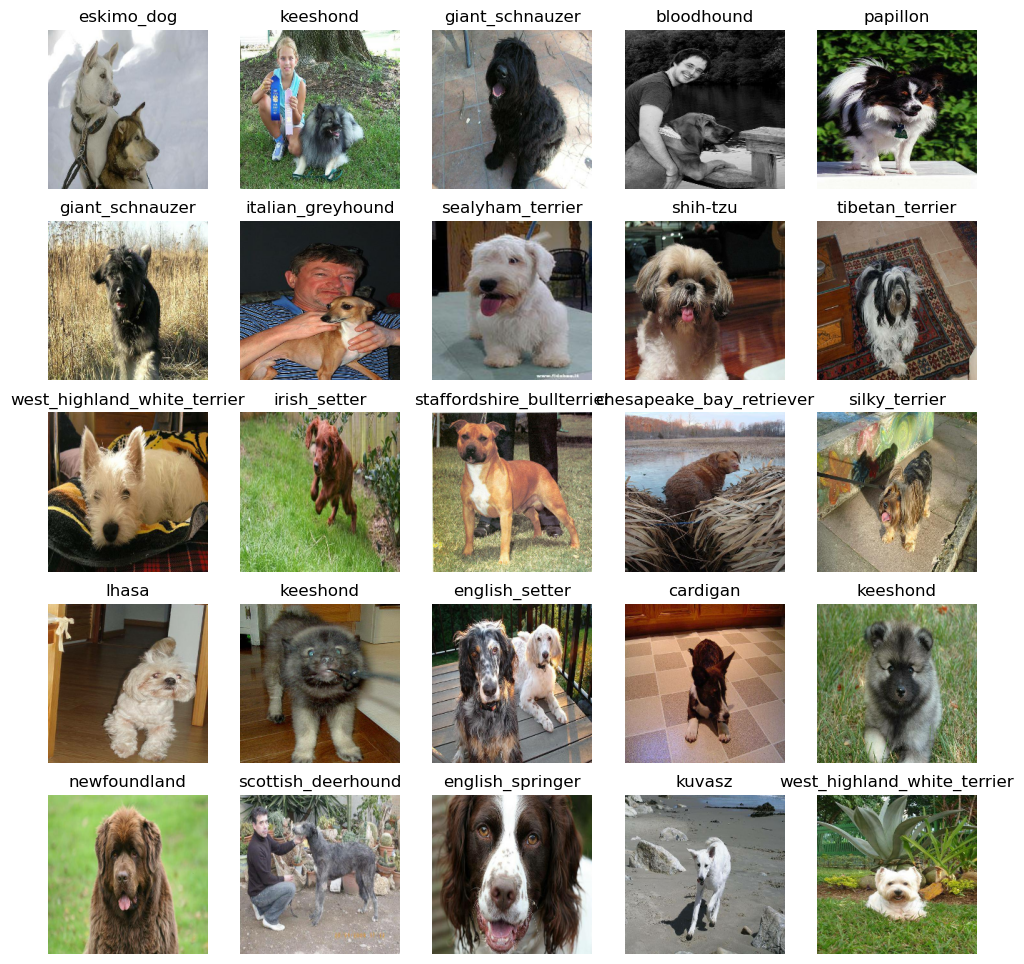

In [32]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

# Building A Model

Before we build a model, there are a few things we need to define:

* Input shape (our images shape in the form of tensors) to our model.
* The output shaep (image labels, in the form of tensors) of our model. 
* The URL of Model we want to use.

In [33]:
IMG_SIZE

224

In [34]:
#Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

#Setup output of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL form tensorflow Hub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1"

In [35]:
# Create a function which builds a Keras Model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    """
    This function builds a Keras Model with given URL, Input and Output shape.
    """
    print("Building model with:",MODEL_URL)

    #Setup the model layers
    model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), #Layer 1 (Input Layer)
                                 tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                       activation="softmax") # Layer 2 (Output Layer)
                                 ])

# Compile the Model
    
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

#Build the Model
    model.build(INPUT_SHAPE)

    return model

In [36]:
model = create_model()
model.summary()

Building model with: https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training  
to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress   
and another for early stopping which prevents our model from training for too long.
### TensorBoard Callback

1. Load the TensorBoard notebook extension  
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.  
3. Visualize our models training logs with the tensorboard magic function (we'll do this after model training).  

In [37]:
# Load TensorBoard notebook Extension
from tensorflow.keras.callbacks import TensorBoard
from tensorboard import notebook

%load_ext tensorboard


In [44]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join("logs",
    #Make it so the logs get tracked whenever we run an experiment
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks. TensorBoard(logdir)

### Early Stopping CallBacks :   
Early Stopping helps stop our model from overfiting by stoppping training if a certain evaluation metrics stops improving

In [45]:
# Create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

## Training a Model (on subset of Data)

Our first model is only going to train on 1000 images, to make sure everything is working

In [46]:
NUM_EPHOCS = 100 #

In [47]:
# Check If we are using GPU

print("GPU", "available Yesssssss!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available Yesssssss!!!)


Let's create a function which trains a model.  

* Create a model using create_model()  
* Setup a TensorBoard callback using create_tensorboard_callback()  
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the  
* callbacks we'd like to use  
* Return the model  

In [48]:
# Build a function to train

def train_model():
    """
    Trains a given Model and returns the trained version
    """

    #create a model
    model = create_model()

    #Create new Tensorboard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the Model to the Data passing it the call backs we created
    model.fit(
        x=train_data,
        epochs = NUM_EPHOCS,
        validation_data=val_data,
        validation_freq=1,
        callbacks=[tensorboard, early_stopping]

    )
    # Return the Fitted Model
    return model

In [49]:
# Fit the Model to Data
model = train_model()

Building model with: https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1
Epoch 1/100
25/25 [==============================] - 9s 158ms/step - loss: 4.5111 - accuracy: 0.1000 - val_loss: 3.3345 - val_accuracy: 0.3050
Epoch 2/100
25/25 [==============================] - 3s 105ms/step - loss: 1.6182 - accuracy: 0.6825 - val_loss: 2.1293 - val_accuracy: 0.5400
Epoch 3/100
25/25 [==============================] - 3s 99ms/step - loss: 0.5551 - accuracy: 0.9388 - val_loss: 1.6820 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 3s 100ms/step - loss: 0.2447 - accuracy: 0.9925 - val_loss: 1.5003 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 2s 98ms/step - loss: 0.1426 - accuracy: 0.9975 - val_loss: 1.4159 - val_accuracy: 0.6700
Epoch 6/100
25/25 [==============================] - 2s 98ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 1.3773 - val_accuracy: 0.6650
Epoch 7/10

Question: It looks like our model is overfitting because it's performing   
far better on the training dataset than the validation dataset,  
what are some ways to prevent model overfitting in deep learning neural  networks?   

* Note: Overfitting to begin with is a good thing! It means our model is learning!!!  
- Checking the TensorBoard logs  
The TensorBoard magic function (tensorboard) will access the logs directory we created earlier and visualize its contents.  

In [51]:
%tensorboard --logdir logs #Launch Tensorboard to Evaluate the Models in Runtime or after Training.


Reusing TensorBoard on port 6006 (pid 2880), started 0:00:30 ago. (Use '!kill 2880' to kill it.)

# Making and Evaluating predictions using a trained Model

In [52]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.int32, name=None))>

In [53]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 102ms/step


array([[2.3244636e-05, 3.2632858e-08, 1.9630721e-05, ..., 6.9353427e-04,
        1.2527492e-05, 7.4478903e-06],
       [9.7294711e-04, 1.1902398e-02, 2.2459755e-04, ..., 1.5106654e-03,
        4.3509794e-05, 3.0894818e-05],
       [2.1083027e-04, 7.9098085e-05, 1.0815128e-04, ..., 4.9180893e-04,
        1.6979636e-03, 9.9592155e-04],
       ...,
       [4.6461297e-05, 1.3169691e-03, 3.4506629e-05, ..., 3.4806697e-05,
        7.4627853e-05, 9.5599692e-04],
       [1.0639512e-03, 2.1029923e-03, 2.2576966e-03, ..., 6.1579415e-04,
        1.8462100e-05, 4.5382322e-04],
       [1.5983934e-04, 7.4030156e-04, 1.8224923e-04, ..., 4.2943217e-04,
        1.0229225e-03, 6.2592229e-04]], dtype=float32)

In [54]:
predictions.shape

(200, 120)

In [55]:
len(y_val)

200

In [56]:
len(predictions[0])

120

In [59]:
np.sum(predictions[0])

1.0

In [63]:
# First prediction
index = 24
print(predictions[index])
print(f"MAX Value (Probability of prediction) : {np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Max Index : {np.argmax(predictions[index])}")
print(f"Predicted Label : {unique_breeds[np.argmax(predictions[index])]}")


[4.31497901e-05 5.90033560e-05 1.64553174e-04 6.80966605e-06
 7.65992552e-02 3.48541653e-05 1.00305122e-04 7.47582118e-04
 6.85600025e-05 1.13472680e-03 3.33148841e-06 1.95615248e-05
 1.93404601e-04 1.84307082e-05 1.79654285e-02 2.08669400e-04
 3.80873280e-05 1.26963935e-03 3.46363995e-05 3.72163224e-04
 3.20003659e-04 1.31479457e-01 4.78406437e-05 2.37127351e-05
 2.53985054e-04 9.84092802e-03 1.96769228e-03 1.76734276e-04
 9.39444974e-02 6.74130251e-06 6.81999973e-06 2.67624364e-05
 4.40175245e-06 2.06624663e-05 8.50967597e-03 2.95186601e-05
 5.05146818e-06 5.91045828e-04 5.09615202e-05 7.99415517e-04
 3.42315354e-04 1.23792097e-05 3.71584429e-05 4.41749115e-04
 3.95772746e-04 1.29461390e-04 9.92469631e-06 4.79344511e-03
 3.34855547e-04 2.45244068e-04 2.08094469e-04 4.92982508e-04
 1.50513501e-04 1.74161606e-02 6.47652487e-05 8.25650204e-05
 6.30285058e-06 1.35782335e-04 3.46581597e-04 2.44172668e-04
 1.16772519e-03 2.69184602e-06 4.43533863e-05 6.18253718e-04
 3.21429288e-05 2.770364

In [64]:
unique_breeds[90]

'rhodesian_ridgeback'

Having the the above functionality is great but we want to be able to do it at scale.  
And it would be even better if we could see the image the prediction is being made on!  
Note: Prediction probabilities are also known as confidence levels.  

In [66]:
# Turn prediction probabilities into their respective label (easier to understand) 
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]
    # Get a predicted label based on an array of prediction probablities
pred_label = get_pred_label(predictions[12])
pred_label

'labrador_retriever'

In [67]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.int32, name=None))>

Since the validation data is in batch dataset,   
have to unbatch it to make predictions on validation images  
compare thos predictions to the calidation labels (truth labels)  

In [68]:
# Create a function to unbatch dataset
images_1 = []
labels_1 = []

#loop through unbatche data
for image, label in val_data.unbatch().as_numpy_iterator():
    images_1.append(image)
    labels_1.append(label)

images_1[0], labels_1[0]

(array([[[0.21626285, 0.25365782, 0.20418301],
         [0.30084178, 0.26638797, 0.21932916],
         [0.44030178, 0.32955247, 0.27339   ],
         ...,
         [0.48585674, 0.7067215 , 0.41176474],
         [0.4919563 , 0.6997994 , 0.4174465 ],
         [0.50263536, 0.7104785 , 0.4281256 ]],
 
        [[0.22165266, 0.25904763, 0.2065077 ],
         [0.325291  , 0.29076296, 0.24370416],
         [0.5328222 , 0.42175776, 0.36654064],
         ...,
         [0.48591566, 0.70615375, 0.41140586],
         [0.50447965, 0.71624434, 0.4221267 ],
         [0.48164308, 0.6934078 , 0.39929014]],
 
        [[0.25123018, 0.28428224, 0.22861989],
         [0.37773287, 0.3358106 , 0.28915966],
         [0.5445962 , 0.43353173, 0.37831464],
         ...,
         [0.4842933 , 0.69937265, 0.40172154],
         [0.47884107, 0.6852311 , 0.3938008 ],
         [0.4836876 , 0.69007766, 0.39864734]],
 
        ...,
 
        [[0.83609205, 0.7929548 , 0.8164842 ],
         [0.8351507 , 0.79201347, 0.81554

In [69]:
get_pred_label(labels_1[0])

'mexican_hairless'

In [74]:
def Unbacthify(data):
    """ 
    Takes a bacthed Dataset of (image, label) Tensors and Returns Separate arrays of images and labels.
    """

    images = []
    labels = []

    #Loop through unbatched data
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels


val_images, val_labels = Unbacthify(val_data)
val_images[0], val_labels[0]

(array([[[0.3750613 , 0.3123162 , 0.21427697],
         [0.3672794 , 0.30453432, 0.20649512],
         [0.3647059 , 0.3019608 , 0.20392159],
         ...,
         [0.47419474, 0.36046922, 0.22713588],
         [0.4715599 , 0.36567754, 0.24803048],
         [0.4715599 , 0.36567754, 0.24803048]],
 
        [[0.35634762, 0.29360253, 0.19556332],
         [0.35510728, 0.29236218, 0.19432299],
         [0.36494014, 0.30219504, 0.20415582],
         ...,
         [0.4766412 , 0.36361834, 0.2300508 ],
         [0.48033968, 0.3744573 , 0.25681025],
         [0.48033968, 0.3744573 , 0.25681025]],
 
        [[0.3421131 , 0.2784314 , 0.17945553],
         [0.35015547, 0.28647375, 0.1874979 ],
         [0.36814603, 0.3044643 , 0.20548847],
         ...,
         [0.48054627, 0.37035018, 0.23584038],
         [0.48235297, 0.37647063, 0.25882354],
         [0.48235297, 0.37647063, 0.25882354]],
 
        ...,
 
        [[0.34763864, 0.24546844, 0.11293858],
         [0.44179213, 0.32488245, 0.18259

In [71]:
get_pred_label(val_labels[0])

'boxer'

Make a function to make it more visual

In [81]:
def plot_pred(pred_probab, labels, images, n=1):
    """ 
    View the prediction, ground truth and image for sample n
    """

    pred_prob, true_label, image = pred_probab[n],labels[n],images[n]

    # get the pred label
    pred_label = get_pred_label(pred_prob)

    #plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    #Change the colour of title depending on prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    #Change plot title to be predicted , probablity of Prediction and truth label
    plt.title("{}{:2.0f}%{}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)


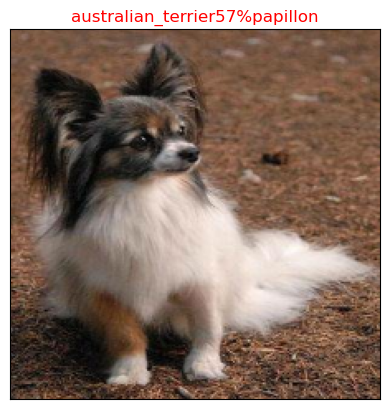

In [94]:
plot_pred(predictions,
        val_labels,
        val_images,
        n=97)

In [ ]:
Now make